## Modelling without missing values

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Necessary libraries for Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

# stats library for statistical analysis
import statsmodels.api as sm
from scipy import stats

In [2]:
df = pd.read_csv("cars_price.csv",index_col = ['Unnamed: 0']) # import data
df.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 12 columns):
make                   40000 non-null object
model                  40000 non-null object
priceUSD               40000 non-null int64
year                   40000 non-null int64
condition              40000 non-null object
mileage(kilometers)    40000 non-null float64
fuel_type              40000 non-null object
volume(cm3)            39970 non-null float64
color                  40000 non-null object
transmission           40000 non-null object
drive_unit             38655 non-null object
segment                36245 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 4.0+ MB


In [4]:
df.isnull().sum()

make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              30
color                     0
transmission              0
drive_unit             1345
segment                3755
dtype: int64

In [5]:
df = df.dropna()
df.shape

(35016, 12)

#### Create New Variable 'car_age' derived from variable 'year'

In [6]:
df['no.year'] = 2020

In [7]:
df['car_age'] = df['no.year'] - df['year']
df.drop(columns=['year','no.year'],inplace=True)
df.head()

,make,model,priceUSD,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,car_age
0,honda,accord,565,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D,27
1,ford,fusion,5550,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M,12
2,nissan,teana,8300,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D,12
3,volkswagen,fox,3300,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A,15
4,nissan,primera,2450,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D,18


#### Correlation between numerical values

In [8]:
df.corr()

,priceUSD,mileage(kilometers),volume(cm3),car_age
priceUSD,1.000000,-0.179098,0.268773,-0.643067
mileage(kilometers),-0.179098,1.000000,0.019253,0.245647
volume(cm3),0.268773,0.019253,1.000000,-0.028499
car_age,-0.643067,0.245647,-0.028499,1.000000


<b> By using correlation between numerical variables: </b>
1. We can see that there is high correlation between car_age and priceUSD variable. conclude that older the car, lower the price of the car.  
2. some positive correlation between volume and price. conclude that high volume car has high price.
3. Very low correlation between mileage and price of the car. 

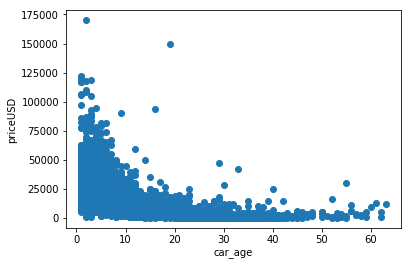

In [9]:
plt.scatter(df['car_age'],df['priceUSD'])
plt.ylabel("priceUSD")
plt.xlabel("car_age")
plt.show()

In [10]:
x = df['car_age']
y = df['priceUSD']
z = sm.add_constant(x)
model = sm.OLS(y,z).fit()
print(model.summary())

/home/prem/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:               priceUSD   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                 2.469e+04
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:50:45   Log-Likelihood:            -3.5441e+05
No. Observations:               35016   AIC:                         7.088e+05
Df Residuals:                   35014   BIC:                         7.088e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.791e+04     74.585    240.142      0.0

In [11]:
E = model.resid_pearson
E

array([-0.01226904, -0.77842591, -0.32145372, ..., -0.16658793,
       -0.07927836,  0.76158635])

In [12]:
y_hat = model.predict(z)
y_hat[:5]

0      638.833492
1    10234.467204
2    10234.467204
3     8315.340462
4     6396.213719
dtype: float64

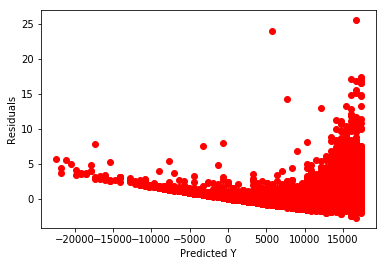

In [13]:
plt.scatter(y_hat,E,color='red')
plt.xlabel('Predicted Y')
plt.ylabel('Residuals')
plt.show()

NOTE: Here, we can see clearly that there is a conical relationship between predicted value and residual. So, we need to transform our dependent variable.

###### USE Log of dependent variable 

In [14]:
x = df['car_age']
y = np.log(df['priceUSD'])
z = sm.add_constant(x)
model1 = sm.OLS(y,z).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               priceUSD   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                 7.658e+04
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:50:46   Log-Likelihood:                -30345.
No. Observations:               35016   AIC:                         6.069e+04
Df Residuals:                   35014   BIC:                         6.071e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2242      0.007   1433.126      0.0

In [15]:
E1 = model1.resid_pearson
E1

array([-1.69854094, -0.53763355,  0.16153596, ...,  0.50393009,
        0.57835232,  0.09008695])

In [16]:
y_hat1 = model1.predict(z)
y_hat1[:5]

0    7.314544
1    8.931027
2    8.931027
3    8.607730
4    8.284434
dtype: float64

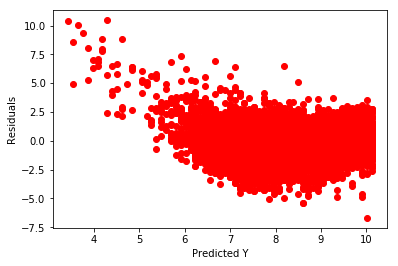

In [17]:
plt.scatter(y_hat1,E1,color='red')
plt.xlabel('Predicted Y')
plt.ylabel('Residuals')
plt.show()

Note: Now, residual plot is fine. Here, we conclude that log of dependent variable is better.

##### Use of all Quatitative feature

In [18]:
x = np.column_stack((df['car_age'],df['mileage(kilometers)'],df['volume(cm3)']))
y = np.log(df['priceUSD'])
z = sm.add_constant(x)
model1 = sm.OLS(y,z).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               priceUSD   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                 3.263e+04
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:50:47   Log-Likelihood:                -27286.
No. Observations:               35016   AIC:                         5.458e+04
Df Residuals:                   35012   BIC:                         5.461e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6873      0.009   1043.075      0.0

<b> Note: </b>
t-statistic is very less for variable mileage.
If we wet alpha = 5%  but here we get p-value is 70 % .
these shows that this feature is not statistically important in modelling. This variable will not contribute significantly.

### Chi-Square Test for independence between categorical variables 

In [19]:
from scipy.stats import chi2_contingency

In [20]:
obs = pd.pivot_table(df[['fuel_type','transmission']],index = 'fuel_type',columns = 'transmission',aggfunc=len)
obs

transmission,auto,mechanics
fuel_type,,
diesel,3821,8877
petrol,8648,13670


In [21]:
chi2,p,dof,tb = chi2_contingency(obs)

In [22]:
chi2,round(p,5),dof

(264.1895523006988, 0.0, 1)

In [23]:
tb

array([[ 4521.68614348,  8176.31385652],
       [ 7947.31385652, 14370.68614348]])

In [24]:
stats.chi2.ppf(0.99,1)

6.6348966010212145

#### Remove variable 'make' and 'model' 

In [25]:
final_df = df.drop(columns=['make','model'],axis=1)
final_df.head()

,priceUSD,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,car_age
0,565,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D,27
1,5550,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M,12
2,8300,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D,12
3,3300,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A,15
4,2450,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D,18


In [26]:
final_df.shape

(35016, 10)

In [27]:
dummy_df = pd.get_dummies(final_df)
dummy_df.head()

,priceUSD,mileage(kilometers),volume(cm3),car_age,condition_for parts,condition_with damage,condition_with mileage,fuel_type_diesel,fuel_type_petrol,color_black,...,drive_unit_rear drive,segment_A,segment_B,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S
0,565,960015.0,2000.0,27,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
1,5550,172000.0,1400.0,12,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8300,223000.0,2500.0,12,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,3300,140000.0,1200.0,15,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,2450,413000.0,2200.0,18,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Feature Importance

In [28]:
X = dummy_df.iloc[:,1:]
y = dummy_df.iloc[:,0]

In [29]:
from sklearn.ensemble import ExtraTreesRegressor
model_etr = ExtraTreesRegressor()
model_etr.fit(X,y)

/home/prem/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [30]:
important_feature = [round(x,5) for x in model_etr.feature_importances_]
important_feature

[0.05192,
 0.10236,
 0.42882,
 5e-05,
 0.00109,
 0.00169,
 0.01088,
 0.0116,
 0.00557,
 0.00298,
 0.00185,
 0.0019,
 0.00438,
 0.00148,
 0.0003,
 0.00344,
 0.00033,
 0.00204,
 0.00352,
 0.00401,
 0.00399,
 0.11106,
 0.07048,
 0.07378,
 0.03546,
 0.00449,
 0.0015,
 0.00099,
 0.00669,
 0.00489,
 0.00328,
 0.00606,
 0.00308,
 0.01935,
 0.00398,
 0.0107]

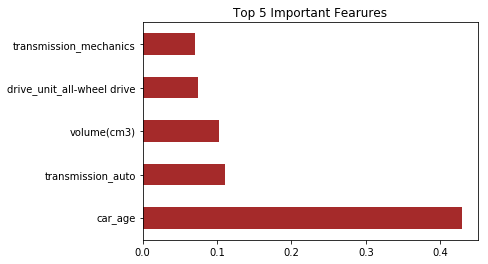

In [31]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model_etr.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh',color='brown')
plt.title('Top 5 Important Fearures')
plt.show()

### Applying OLS model

In [32]:
X.head()

,mileage(kilometers),volume(cm3),car_age,condition_for parts,condition_with damage,condition_with mileage,fuel_type_diesel,fuel_type_petrol,color_black,color_blue,...,drive_unit_rear drive,segment_A,segment_B,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S
0,960015.0,2000.0,27,0,0,1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
1,172000.0,1400.0,12,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,223000.0,2500.0,12,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,140000.0,1200.0,15,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
4,413000.0,2200.0,18,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [33]:
# remove this feature because this is a dependent on car_age variable
X.drop(columns=['mileage(kilometers)'],inplace=True)

In [34]:
z = sm.add_constant(X)
logy = np.log(y)
Model = sm.OLS(logy,z).fit()
print(Model.summary())

/home/prem/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:               priceUSD   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     5911.
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:50:56   Log-Likelihood:                -19565.
No. Observations:               35016   AIC:                         3.919e+04
Df Residuals:                   34986   BIC:                         3.944e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [35]:
E = Model.resid_pearson
E

array([-2.29783319, -0.90968399,  0.65151731, ...,  0.79309678,
        0.20522515, -0.74815491])

In [36]:
y_pred = Model.predict(z)

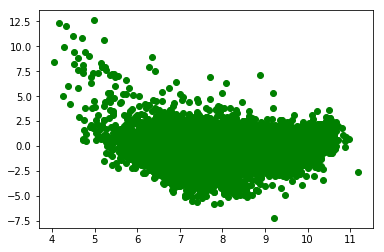

In [37]:
plt.scatter(y_pred,E,color='green')
plt.show()

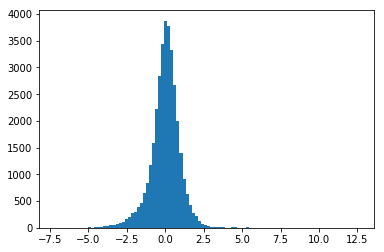

In [38]:
plt.hist(E,bins=100)
plt.show()

### Linear Regression

In [39]:
# Importing some necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [40]:
# Split Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(X,logy,test_size = 0.2,random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(28012, 35) (7004, 35) (28012,) (7004,)


In [41]:
# setting intercept as true
lgr = LinearRegression(fit_intercept = True)

In [42]:
# fit the model
model_lin1 = lgr.fit(X_train,y_train)

In [43]:
# predicting model on test data
car_predictions_lin1 = model_lin1.predict(X_test)

In [44]:
# R Squared Value
r2_lin_train1 = model_lin1.score(X_train,y_train)
r2_lin_test1 = model_lin1.score(X_test,y_test)
print('R2 for Train Data',r2_lin_train1)
print('R2 for Test Data', r2_lin_test1)

R2 for Train Data 0.8313370076477028
R2 for Test Data 0.8266691436646172


In [45]:
print('MAE:', mean_absolute_error(y_test, car_predictions_lin1))
print('MSE:', mean_squared_error(y_test, car_predictions_lin1))
print('RMSE:', np.sqrt(mean_squared_error(y_test, car_predictions_lin1)))
print('R2 Score:', r2_score(y_test, car_predictions_lin1))

MAE: 0.29642161076374846
MSE: 0.18020888928049006
RMSE: 0.42451017570900473
R2 Score: 0.8266691436646172


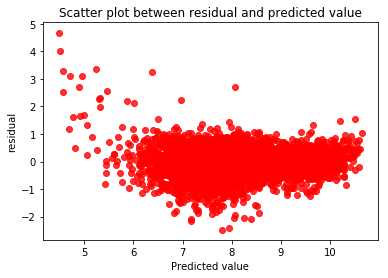

In [46]:
# Residuals plot
residual1  = y_test - car_predictions_lin1
sns.regplot(x = car_predictions_lin1, y = residual1,scatter = True, fit_reg= False,color='red')
plt.xlabel('Predicted value')
plt.ylabel('residual')
plt.title('Scatter plot between residual and predicted value')
plt.show()

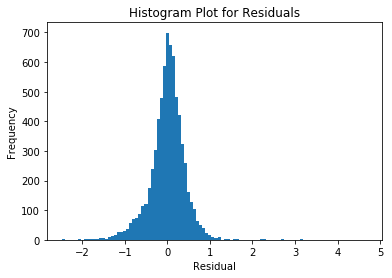

In [47]:
plt.hist(residual1,bins=100)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram Plot for Residuals')
plt.show()

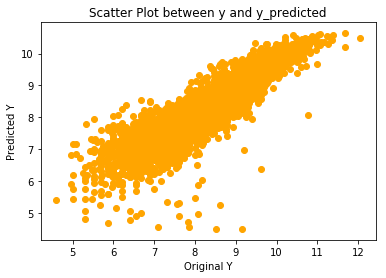

In [48]:
plt.scatter(y_test,car_predictions_lin1,c='orange')
plt.xlabel('Original Y')
plt.ylabel('Predicted Y')
plt.title('Scatter Plot between y and y_predicted')
plt.show()

### Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
rf = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(15, 30, num = 4)]
# max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

In [ ]:
rf_random.best_params_

In [ ]:
rf_random.best_score_

In [52]:
rf = RandomForestRegressor(n_estimators=700,min_samples_split=10,min_samples_leaf=2,max_features='auto',max_depth=20)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [53]:
y_pred = rf.predict(X_test)

In [54]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 0.23956740708558033
MSE: 0.11647814600505604
RMSE: 0.3412889479679294
R2 Score: 0.8879674755667013


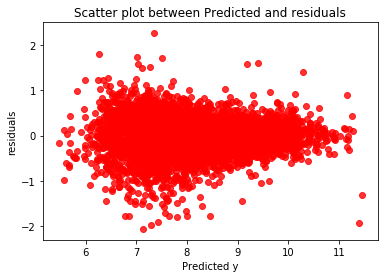

In [55]:
# Residuals plot
residuals  = y_test - y_pred
sns.regplot(x = y_pred, y = residuals,scatter = True, fit_reg= False,color='red')
plt.xlabel('Predicted y')
plt.ylabel('residuals')
plt.title('Scatter plot between Predicted and residuals')
plt.show()

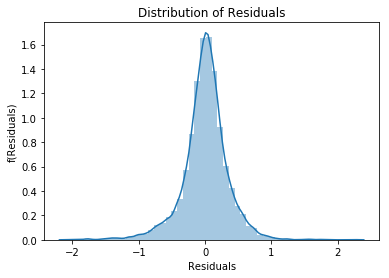

In [56]:
sns.distplot(residuals)
plt.xlabel('Residuals')
plt.ylabel('f(Residuals)')
plt.title('Distribution of Residuals')
plt.show()

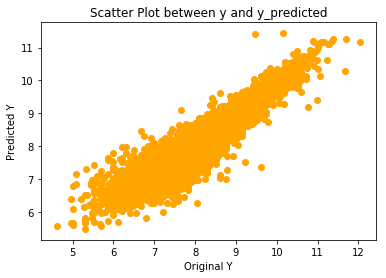

In [57]:
plt.scatter(y_test,y_pred,c='orange')
plt.xlabel('Original Y')
plt.ylabel('Predicted Y')
plt.title('Scatter Plot between y and y_predicted')
plt.show()

### Conclusion: 
If we compare all models with or without missing values then we get better performance in random forest model without missing values. So, we use this model in our final deployment. 

In [63]:
import pickle
# open a file, where you want to store the data in wb(write-binary) mode 
file = open('car_price_rf_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf, file)
file.close()

file = open('car_feature.pkl','wb')
pickle.dump(list(X_test.columns),file)
file.close()

In [ ]:
import pickle
# open a file, where you want to store the data in wb(write-binary) mode 
file = open('car_price_lr_model.pkl', 'wb')

# dump information to that file
pickle.dump(model_lin1, file)
file.close()